# Hourly Energy Consumption

### Importing Libraries


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [145]:
df = pd.read_csv("AEP_HOURLY.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Datetime        AEP_MW
0  2023-01-01 00:00:00  13478.000000
1  2023-01-01 01:00:00  13478.022907 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438000 entries, 0 to 437999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  438000 non-null  object 
 1   AEP_MW    438000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 6.7+ MB
None 

Describe the Dataset  

              AEP_MW
count  438000.000000
mean    20010.521050
std      4280.592556
min     13478.000000
25%     16234.944026
50%     19555.824864
75%     23555.996590
max     28374.409119 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



### Reformat the Date Time Coloumns

In [146]:
# Extract all Data Like Year Month Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week ## because the week package has been , deprecated by developers
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2023-01-01,13478.0,1,2023,2023-01-01,00:00:00,52,Sunday


In [147]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036
 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050
 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064
 2065 2066 2067 2068 2069 2070 2071 2072] 

Total Number of Unique Year 50 



### Let us see the total energy consumption of a Year

/tmp/ipykernel_10949/3596599376.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Energy Consumption According to Year')

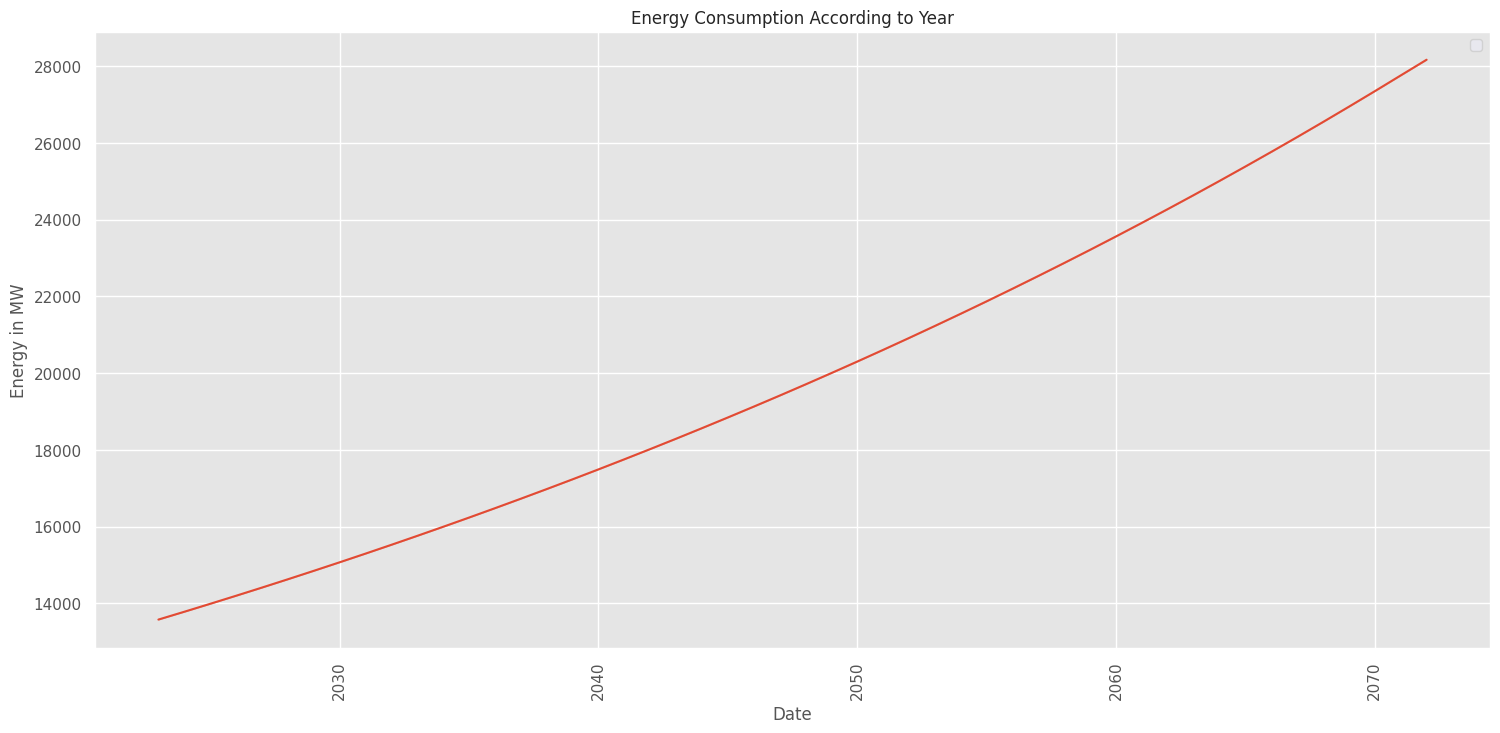

In [193]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

/tmp/ipykernel_10949/1202724965.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


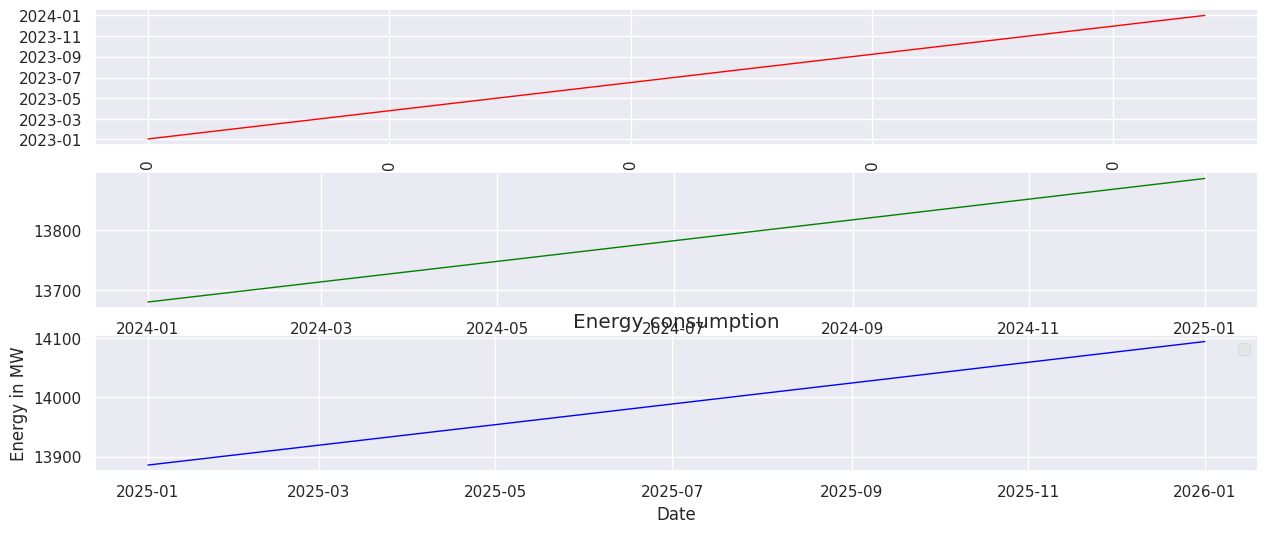

In [149]:
from matplotlib import style
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

style.use('ggplot')

# Ensure the Datetime column is parsed and set as the index
dataset.index = pd.to_datetime(dataset.index)

# Filter the dataset by year
data_2023 = dataset.loc['2023']
data_2024 = dataset.loc['2024']
data_2025 = dataset.loc['2025']

y_2023 = data_2023["AEP_MW"].to_list()
x_2023 = data_2023.index.to_list()
ax1.plot(x_2023, color="red", linewidth=1)

y_2024 = data_2024["AEP_MW"].to_list()
x_2024 = data_2024.index.to_list()
ax2.plot(x_2024, y_2024, color="green", linewidth=1)

y_2025 = data_2025["AEP_MW"].to_list()
x_2025 = data_2025.index.to_list()
ax3.plot(x_2025, y_2025, color="blue", linewidth=1)

plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Energy consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

#### Energy Distribution

Text(0.5, 1.0, 'Ennergy Distribution')

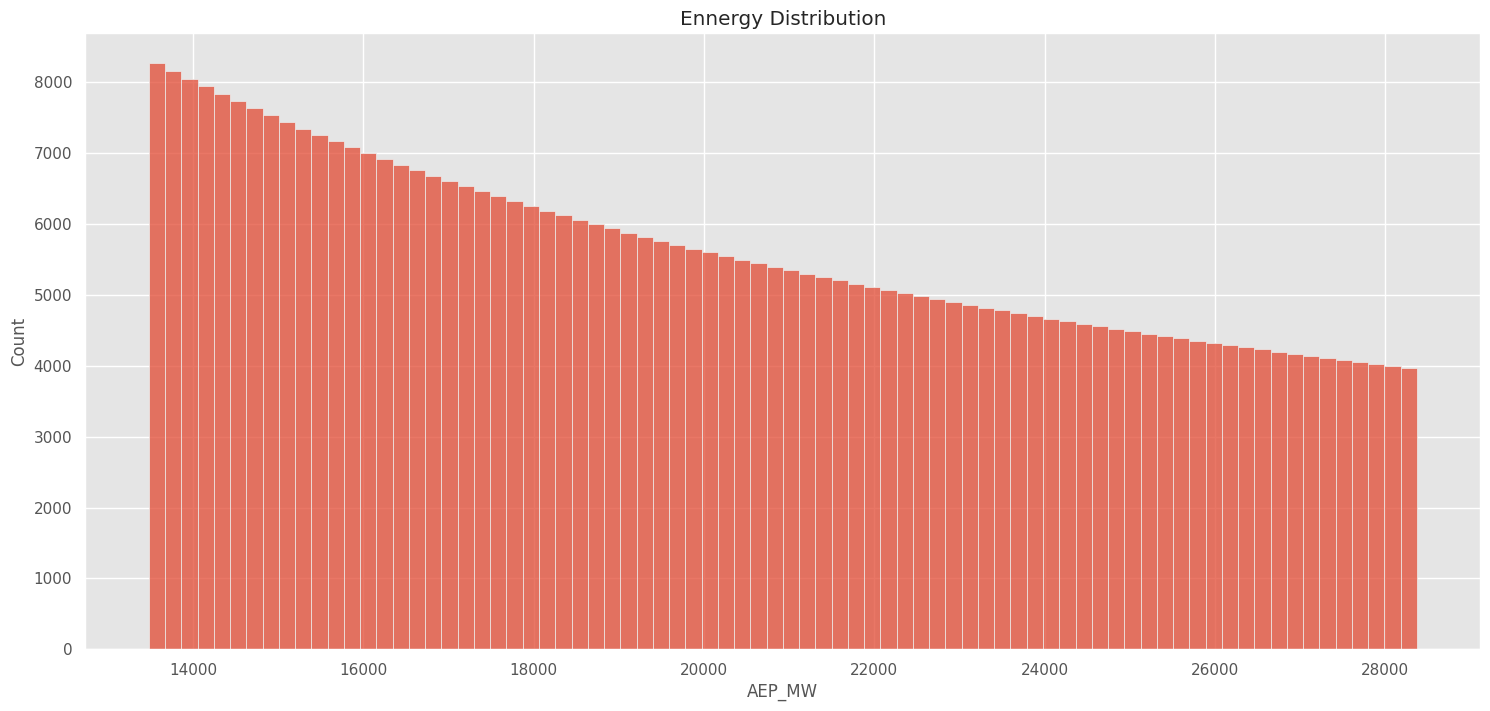

In [150]:
sns.histplot(dataset["AEP_MW"])  ##we're not gonna use the distplot , coz it's been deprecated by the seaborn library
plt.title("Ennergy Distribution")

#### Energy Consumption With Respect to Years

/tmp/ipykernel_10949/734829381.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


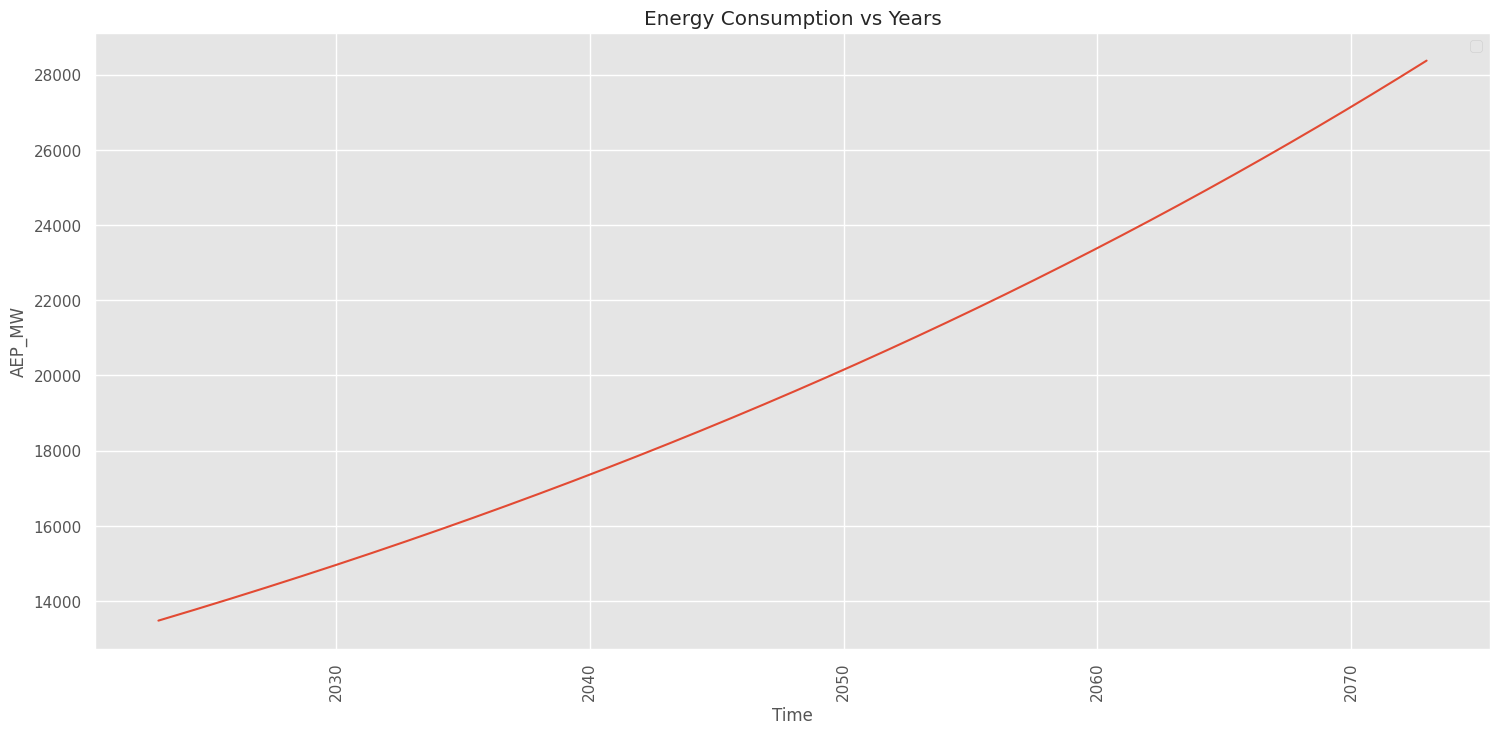

In [151]:
# Ensur the Time column is parsed as a datetime object
dataset["Time"] = pd.to_datetime(dataset["Time"], format='%H:%M:%S').dt.time

fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plotting the data
sns.lineplot(x=dataset.index, y=dataset["AEP_MW"], data=dataset)
plt.title("Energy Consumption vs Years")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.show()


#### Energy Consumption vs Time

/tmp/ipykernel_10949/1592424438.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


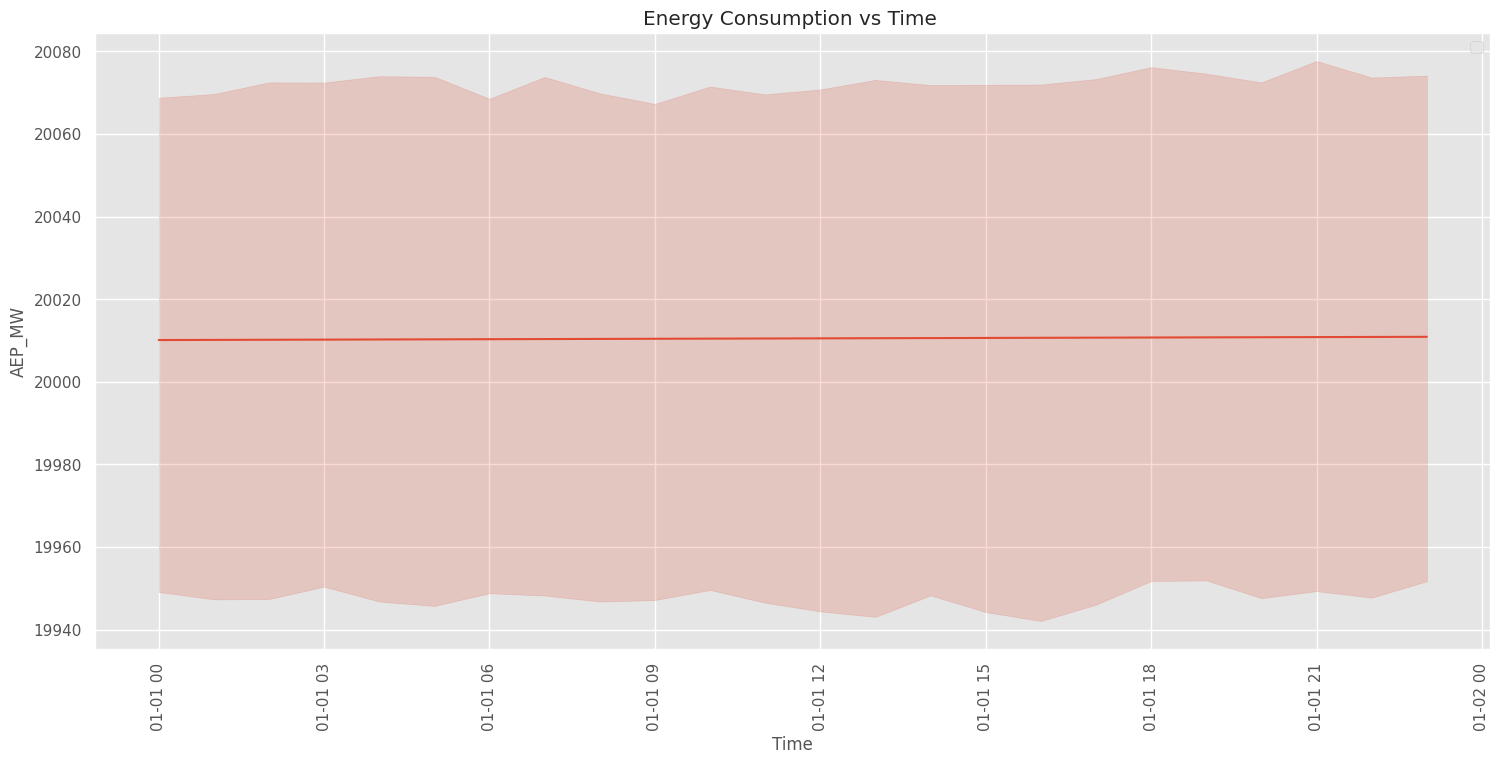

In [152]:
fig = plt.figure()
ax1= fig.add_subplot(111)

dataset["Time"] = pd.to_datetime(dataset["Time"], format='%H:%M:%S').dt.time
sns.lineplot(x=pd.to_datetime(dataset["Time"], format='%H:%M:%S'), y=dataset["AEP_MW"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

### Resampleing The Dataset


In [153]:
import pandas as pd

In [162]:
# Load the dataset
df = pd.read_csv("AEP_HOURLY.csv")

In [163]:
# Ensure the 'Datetime' column is parsed as datetime and set as the index
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

In [164]:
# Resample the dataset to daily frequency and take the mean
NewDataSet = df.resample('D').mean()

In [165]:
# Print shapes of old and new datasets
print("Old Dataset ", df.shape)
print("New Dataset ", NewDataSet.shape)

Old Dataset  (438000, 1)
New Dataset  (18250, 1)


In [166]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [167]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (18190, 1)
Test Set Shape  (100, 1)


In [168]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [169]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(18130, 60, 1)
(18130, 1)


In [170]:
# Flatten the input data for SVM
X_Train_flattened = X_Train.reshape(X_Train.shape[0], -1)


In [171]:
# Define the SVR model
svr =  SVR()

In [172]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': [1e-3, 1e-4, 'scale', 'auto']
}

In [173]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)


## Training the Support Vector Machine Model

In [174]:
# Train the SVR model using GridSearchCV
grid_search.fit(X_Train_flattened, Y_Train.ravel())


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.0001, 'scale', 'auto'],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [175]:
# Get the best model from grid search
best_svr = grid_search.best_estimator_

In [176]:
# To make predictions
# Assuming X_Test is defined and preprocessed similarly to X_Train
X_Test = TestData.iloc[:, 0:1].values
X_Test_scaled = sc.transform(X_Test)

In [177]:
# Create sequences for testing
X_Test_sequences = []
for i in range(60, X_Test_scaled.shape[0]):
    X_Test_sequences.append(X_Test_scaled[i-60:i])

In [178]:
# Convert to numpy arrays
X_Test_sequences = np.array(X_Test_sequences)

In [179]:
# Flatten the input data for SVM
X_Test_flattened = X_Test_sequences.reshape(X_Test_sequences.shape[0], -1)

In [180]:
# Make predictions
predictions = best_svr.predict(X_Test_flattened)

In [181]:
print(predictions)

[0.9013047  0.90136683 0.90142896 0.9014911  0.90155324 0.90161538
 0.90167752 0.90173966 0.90180181 0.90186396 0.90192612 0.90198827
 0.90205043 0.90211259 0.90217475 0.90223692 0.90229908 0.90236125
 0.90242343 0.9024856  0.90254778 0.90260996 0.90267214 0.90273433
 0.90279651 0.9028587  0.9029209  0.90298309 0.90304529 0.90310749
 0.90316969 0.90323189 0.9032941  0.90335631 0.90341852 0.90348073
 0.90354295 0.90360517 0.90366739 0.90372961]


## Test Data


In [182]:
TestData.head(2)

,AEP_MW
Datetime,
2072-09-10,28259.503975
2072-09-11,28260.656724


In [183]:
TestData.shape

(100, 1)

In [184]:
NewDataSet.shape

(18250, 1)

In [185]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)
Df_Total.shape

(18350, 1)

In [186]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [187]:
# Assuming Df_Total and TestData are already defined and preprocessed

# Prepare the inputs for the test set
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# Reshape the inputs
inputs = inputs.reshape(-1, 1)

# Normalize the dataset
inputs = sc.transform(inputs)

# Create sequences for testing
X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])

# Convert into Numpy Array
X_test = np.array(X_test)

# Flatten the input data for SVM
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Pass to the SVM model
predicted_stock_price = best_svr.predict(X_test_flattened)

# Reshape predicted_stock_price to 2D array for inverse transformation
predicted_stock_price = predicted_stock_price.reshape(-1, 1)

# Do inverse transformation to get values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

print(predicted_stock_price)

[[26878.09150527]
 [26877.47579417]
 [26876.86012134]
 [26876.24448677]
 [26875.62889047]
 [26875.01333243]
 [26874.39781266]
 [26873.78233114]
 [26873.16688788]
 [26872.55148289]
 [26871.93611614]
 [26871.32078766]
 [26870.70549743]
 [26870.09024545]
 [26869.47503173]
 [26868.85985625]
 [26868.24471903]
 [26867.62962005]
 [26867.01455932]
 [26866.39953684]
 [26865.7845526 ]
 [26865.1696066 ]
 [26864.55469885]
 [26863.93982934]
 [26863.32499807]
 [26862.71020503]
 [26862.09545024]
 [26861.48073368]
 [26860.86605535]
 [26860.25141526]
 [26859.6368134 ]
 [26859.02224978]
 [26858.40772438]
 [26857.79323721]
 [26857.17878827]
 [26856.56437755]
 [26855.95000506]
 [26855.3356708 ]
 [26854.72137475]
 [26854.10711693]
 [26853.49289733]
 [26852.87871594]
 [26852.26457278]
 [26851.65046783]
 [26851.03640109]
 [26850.42237257]
 [26849.80838227]
 [26849.19443017]
 [26848.58051629]
 [26847.96664061]
 [26847.35280314]
 [26846.73900388]
 [26846.12524282]
 [26845.51151997]
 [26844.89783532]
 [26844.28

In [188]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [189]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

### Future Predicted

In [190]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2072-09-10,28259.503975,26878.091505
1,2072-09-11,28260.656724,26877.475794
2,2072-09-12,28261.809520,26876.860121
3,2072-09-13,28262.962363,26876.244487
4,2072-09-14,28264.115253,26875.628890
...,...,...,...
95,2072-12-14,28369.225351,26873.478956
96,2072-12-15,28370.382576,26874.401393
97,2072-12-16,28371.539848,26875.323867
98,2072-12-17,28372.697167,26876.246377


In [191]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

/tmp/ipykernel_10949/3048159653.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


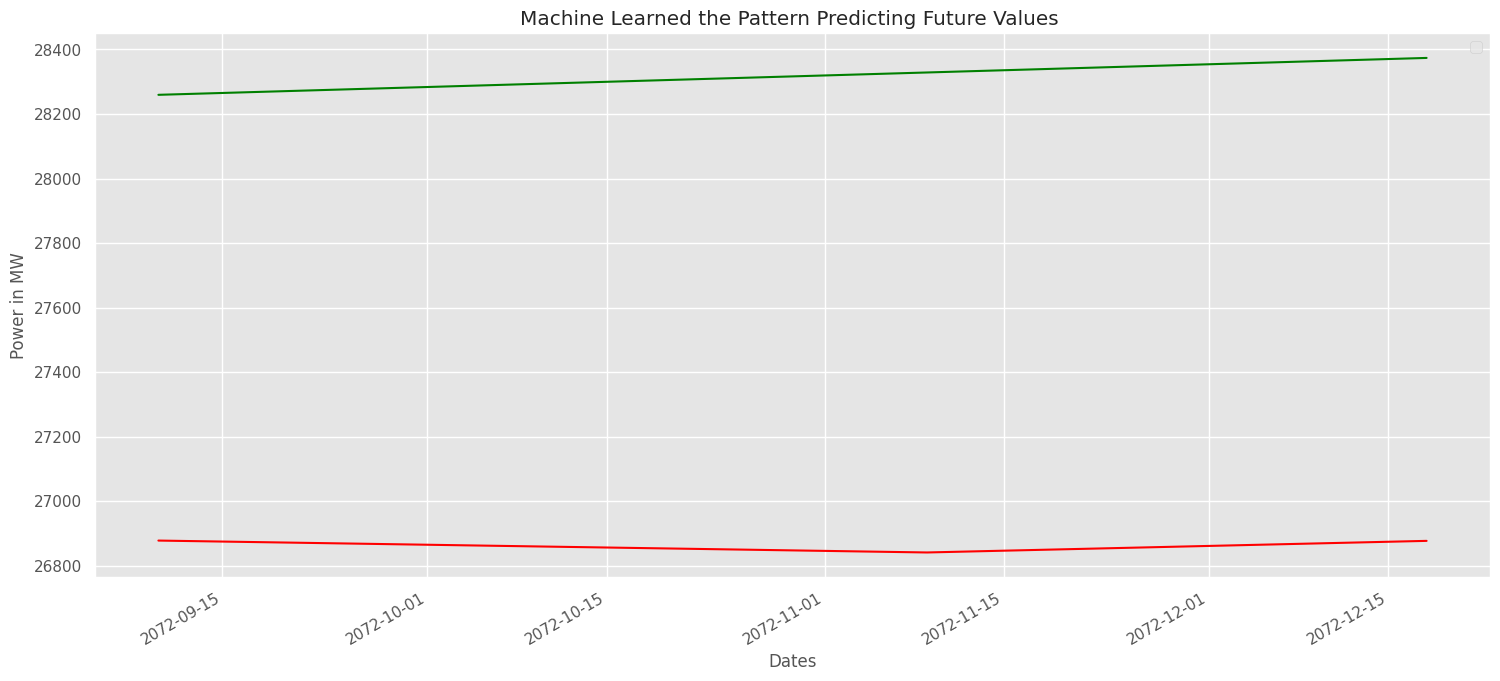

In [192]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()